https://www.kaggle.com/code/kasimchristianloan/nlu-covid-emotion-showcase

In [1]:
import nlu

In [2]:
import os
import numpy as np 
import pandas as pd 



In [3]:
df = pd.read_csv('jp_nlp_cleaned.csv')

In [4]:
df.head(3)

,Unnamed: 0,reviewer_info,title,rating,review,date,review_translated,reviwe_translated_original
0,0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...
1,1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年02月23日,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...
2,2,男性/ Solution Engineer/ 現職（回答時）/ 中途入社/ 在籍3～5年/ ...,Annual salary/salary,5.0,給与制度:提示される想定年収の8割が固定給で残り2割がインセンティブインセンティブは四半期ご...,2020年11月20日,"[ ' Salary ' , ' system ' , ' 80 ' , ' ' , ' '...",Salary system: 80% of the estimated annual inc...


In [5]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
df.head(2)

,reviewer_info,title,rating,review,date,review_translated,reviwe_translated_original
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年02月23日,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...


In [7]:
df.shape

(686, 7)

## Emotion analysis

22/08/12 09:31:37 WARN Utils: Your hostname, HITOMIs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.84.21 instead (on interface en0)
22/08/12 09:31:37 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/hitomihoshino/.ivy2/cache
The jars for the packages stored in: /Users/hitomihoshino/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-d102d15b-63a9-4945-a0ef-8b238a0cba6e;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;4.0.2 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.code.findbugs#annotations;3.0.1 in central
	found net.jcip#jcip-annotations;1.0 in central
	found com.google.code.findbugs#jsr305;3.0.1 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.p

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[ | ]classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[ / ]Download done! Loading the resource.
[ | ]

2022-08-12 09:32:03.041110: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[ | ]tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[ / ]Download done! Loading the resource.
[OK!]


<AxesSubplot:title={'center':'Count of predicted emotion labels'}>

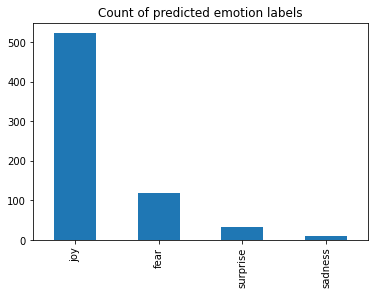

In [8]:
em_preds = nlu.load('emotion').predict(df['reviwe_translated_original'],output_level='document')
em_preds['emotion'].value_counts().plot.bar(title='Count of predicted emotion labels')

In [9]:
# em_joy = df[df['emotion'] == 'joy']
# em_fear = df[df['emotion'] == 'fear']
# em_sadness = df[df['emotion'] == 'sadness']
# em_surprise = df[df['emotion'] == 'surprise']


# em_joy['review'].to_csv('em_joy')
# em_fear['review'].to_csv('em_fear')
# em_sadness['review'].to_csv('em_sadness')
# em_surprise['review'].to_csv('em_surprise')

## Sentiment

sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[ | ]sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[ / ]Download done! Loading the resource.
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[ | ]glove_100d download started this may take some time.
Approximate size to download 145.3 MB
Download done! Loading the resource.
[OK!]


<AxesSubplot:title={'center':'Count of predicted sentiment labels'}>

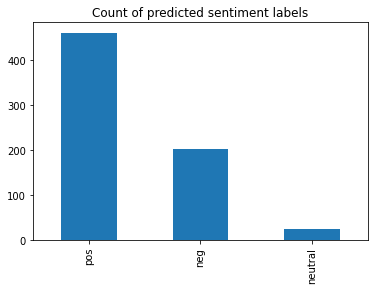

In [10]:
senti_preds = nlu.load('sentiment').predict(df['reviwe_translated_original'],output_level='document')
senti_preds['sentiment'].value_counts().plot.bar(title='Count of predicted sentiment labels')

In [11]:
df['sentiment'] = senti_preds['sentiment']
df['emotion'] = em_preds['emotion']

In [12]:
df.head(2)

,reviewer_info,title,rating,review,date,review_translated,reviwe_translated_original,sentiment,emotion
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年03月 6日,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...,neg,joy
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年02月23日,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...,pos,joy


In [13]:
senti_neg = df[df['sentiment'] == 'neg']
senti_neutral = df[df['sentiment'] == 'neutral']
senti_pos = df[df['sentiment'] == 'pos']

senti_neg['review'].to_csv('sentiment_neg')
senti_neutral['review'].to_csv('sentiment_neutral')
senti_pos['review'].to_csv('sentiment_pos')

In [14]:
df['em_x_senti'] = list(zip(df.emotion, df.sentiment))

In [15]:
len(df['emotion'].unique())

4

In [16]:
len(df['sentiment'].unique())

3

In [17]:
# total possible value = 3x4 = 12
len(df['em_x_senti'].unique())

10

In [18]:
df['em_x_senti'].value_counts()

(joy, pos)         347
(joy, neg)         154
(fear, pos)         82
(fear, neg)         35
(surprise, pos)     23
(joy, neutral)      22
(surprise, neg)     11
(sadness, pos)       8
(sadness, neg)       2
(fear, neutral)      2
Name: em_x_senti, dtype: int64

In [19]:
fear_x_neg = df[(df['emotion'] == 'fear') & (df['sentiment'] == 'neg')]
fear_x_neg['review'].to_csv('fear_x_neg')

fear_x_neg = df[(df['emotion'] == 'joy') & (df['sentiment'] == 'pos')]
fear_x_neg['review'].to_csv('joy_x_pos')

fear_x_neg = df[(df['emotion'] == 'fear') & (df['sentiment'] == 'pos')]
fear_x_neg['review'].to_csv('fear_x_pos')

fear_x_neg = df[(df['emotion'] == 'joy') & (df['sentiment'] == 'neg')]
fear_x_neg['review'].to_csv('joy_x_neg')

fear_x_neg = df[(df['emotion'] == 'joy') & (df['sentiment'] == 'neutral')]
fear_x_neg['review'].to_csv('joy_x_neutral')

fear_x_neg = df[(df['emotion'] == 'surprise') & (df['sentiment'] == 'pos')]
fear_x_neg['review'].to_csv('surprise_x_pos')

fear_x_neg = df[(df['emotion'] == 'sadness') & (df['sentiment'] == 'pos')]
fear_x_neg['review'].to_csv('sadness_x_pos')

fear_x_neg = df[(df['emotion'] == 'sadness') & (df['sentiment'] == 'neg')]
fear_x_neg['review'].to_csv('sadness_x_neg')

fear_x_neg = df[(df['emotion'] == 'surprise') & (df['sentiment'] == 'neg')]
fear_x_neg['review'].to_csv('surprise_x_neg')

In [20]:
df.shape

(686, 10)

In [21]:
df.to_csv('review_jp_nlp.csv')